<div align=center>

<br/>
<font size=4>
        <b>
        In the Name of God
    </b>
    </font>
    <br/>
    <br/>
    <font align=center size=5>
        <br/>
        Project
        <br/><br/>
        <font color=blue size=5>
            Face Recognition
        </font>
        <br/>
        <br/>
    </font>
    <hr/>
    <font size=4>
         Dr. Mazlaghani
        <br/>
        <br/>
        <br/>
        Winter 2023
        <br/>
        <br/>
    </font>
    <br/>
    <br/>
    <br/>
</div>

<div dir="rtl">
    <h1>
        تشخیص چهره
    </h1>
</div>

<div dir="rtl" style="font-size:18px"> 
    در الگوریتم‌های تشخیص چهره، درون عکس‌ها به دنبال تشخیص خصوصیت‌های خاص عکس بودند. به طور مثال چشم، بینی و ...
     که می‌توانست حاکی از وجود چهره در عکس باشند. واضح است که چنین روش‌هایی هزینه‌بر و در موارد زیادی نادقیق هستند.
    <br/>
    <br/>
    در این پروژه به دنبال پیاده سازی روشی هستیم که بتوانیم این تشخیص را با استفاده از مفاهیم آموخته شده به نحو موثری انجام دهیم.
    </div>

## Load Data (10 points)



<br/>

<div dir="rtl" style="font-size:18px">
    قبل از اینکه درباره پیاده‌سازی این الگوریتم صحبت کنیم لازم است داده‌هایی که مورد استفاده قرار می‌دهیم را داشته باشیم.
    داده‌های مورد نظر در زیپ مربوطه همراه این نوتبوک قرار گرفته‌است.
    <br/>
    دقت کنید که این دیتاست شامل تصاویر مربوط به چهره 200 فرد است.
    هر کدام از افراد دو عکس یکی حالت طبیعی و یکی خندان دارند.
    پس در کل 400 عکس داریم.
    ابتدا تمام عکس‌ها را لود کنید و داشته باشید که در ادامه به آن‌ها نیاز پیدا می‌کنید.
    <br/>
    <br/>
    در نهایت برای این که مطمئن شوید که دیتا را درست لود کرده‌اید،
    به طور رندوم 5 تا از این چهره‌ها را در دو حالت خندان و عادی نمایش دهید. برای اینکار میتوانید از تابع imshow از لایبرری matplotlib استفاده کنید.
    <br/>
</div>

400


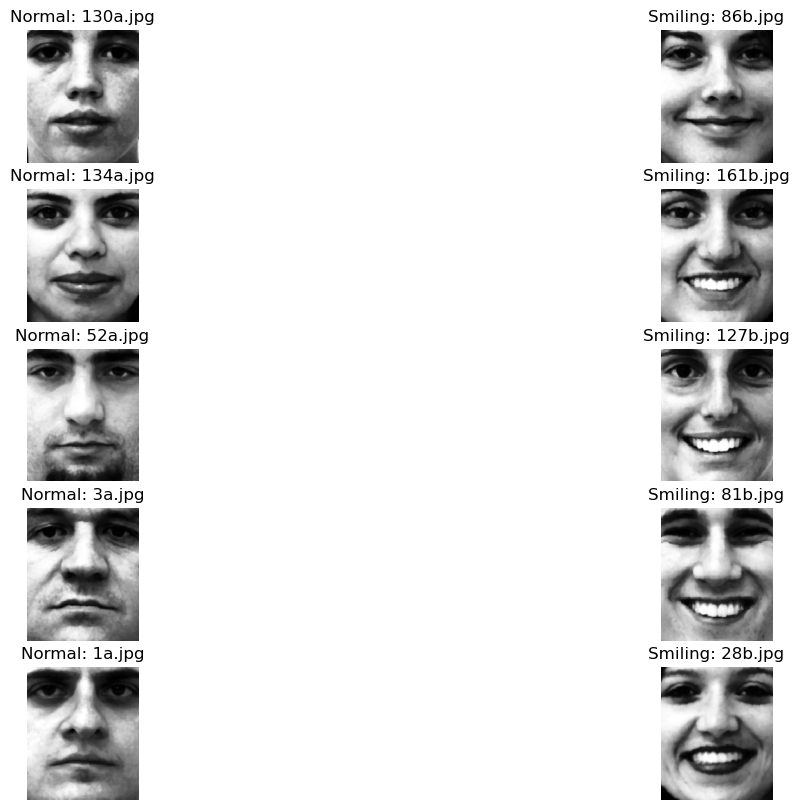

In [92]:
import os
import random
import matplotlib.pyplot as plt
import cv2

data_dir = "datasets"
image_files = os.listdir(data_dir)
print(len(image_files))

normal_images=[img for img in image_files if img.endswith('a.jpg')]
smiling_images=[img for img in image_files if img.endswith('b.jpg')]

random_normal_images =random.sample(normal_images, 5)
random_smiling_images =random.sample(smiling_images, 5)

plt.figure(figsize=(15, 10))
for i, (normal_img, smiling_img) in enumerate(zip(random_normal_images, random_smiling_images)):
    normal_img_path = os.path.join(data_dir, normal_img)
    smiling_img_path = os.path.join(data_dir, smiling_img)

    normal_img_data = cv2.imread(normal_img_path, cv2.IMREAD_GRAYSCALE)
    smiling_img_data = cv2.imread(smiling_img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(normal_img_data, cmap='gray')
    plt.title(f"Normal: {normal_img}")
    plt.axis('off')
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(smiling_img_data, cmap='gray')
    plt.title(f"Smiling: {smiling_img}")
    plt.axis('off')

plt.show()


<br/>
<div dir="rtl" style="font-size:18px">
حال فعلا تنها با عکس‌های چهره طبیعی کار داریم.
    190 تا عکس اول از آن را در نظر بگیرید
     هر کدام را به صورت یک وکتور تک بعدی $\Gamma_i$ در بیاورید.
     در نهایت ماتریس حاصل از داده‌ها که $\Gamma$ است
    را تشکیل دهید. دقت کنید که ستون $i$ ام این ماتریس
    $\Gamma_i$ است.
    <br/>
<div/>

In [93]:
import numpy as np
normal_images_190=normal_images[:190]
vectors=[]
for img_name in normal_images_190:
    img_path=os.path.join(data_dir,img_name)
    img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    img_vector=img.flatten()
    vectors.append(img_vector)
gamma=np.column_stack(vectors)
print('vectors: ' ,np.shape(vectors))
print('gamma: ' ,gamma.shape)

vectors:  (190, 31266)
gamma:  (31266, 190)


# PCA 
<br/>
<br/>

<div dir="rtl" style="font-size:18px">
 <br/>
    الگوریتم Principal Component Analysis یا همان PCA یک روش برای کاهش ابعاد داده‌ی موردنظر است که در حوزه یادگیری ماشین و علوم داده کاربرد فراوان دارد.
با کاهش ابعاد سادگی را افزایش داده و در عین حال همانگونه که انتظار می‌رود ورودی با کاهش دقت همراه خواهد شد. در الگوریتم PCA تلاش بر این است که در عین کاهش ابعاد، کمترین میزان اطلاعات را از دست بدهیم.
    پیشنهاد می‌شود قبل از انجام پروژه مطالعات بیشتری در رابطه با این الگوریتم داشته باشید.
<br/>
    <br/>
در ادامه‌ی بخش‌ها می‌خواهیم PCA را پیاده سازی کنیم.
گفتیم که برای تشخیص چهره‌ها به دنبال پیدا کردن مشخصه‌های خاص درون هر عکس هستیم. این مشخصه‌ها ممکن است ترکیبی از چندویژگی درون عکس باشند، یا حتی ویژگی‌هایی 
    باشند که به طور طبیعی قادر به تشخیص آنها نیستیم.
    در اینجا با استفاده از الگوریتم PCA در تلاش برای پیدا کردن همچین ویژگی‌هایی هستیم.
    <br/>
    <br/>
با PCA قرار است کار زیر را انجام دهیم :
    <br/>
    <br/>
فرض کنید هر عکس به صورت یک آرایه دو بعدی $N\times M$ باشد ، بنابراین هر عکس را می‌توان با یک بردار به طول $N\times M$ نشان دهیم، پس در یک فضای $N\times M$ بعدی قرار دارد. فرض کنید $W$ فضایی باشد که تمامی عکس‌های صورت در آن قرار دارند ، اسم آن را Face Space بگذارید. در اینجا به دنبال پیدا کردن K بردار عمود بر هم هستیم که فضای $W$ را Span می‌کنند.
    <div/>

## Mean image (5 points)

<div dir="rtl" style="font-size:18px">
    
<div/>

<div dir="rtl" style="font-size:18px">
    در این قسمت برای نرمالایز کردن نیاز به 
    mean image
    داریم.
    آن را بدست آورید و تصویر آن را نمایش هم دهید.
    $$
    \Psi = \frac{1}{n}\sum_{i = 1}^{n} \Gamma_i
    $$
     در اینجا $n$ تعداد داده های شماست.
     دقت کنید فعلا کل کار ما بر روی 190 عکس چهره طبیعی است.
<div/>

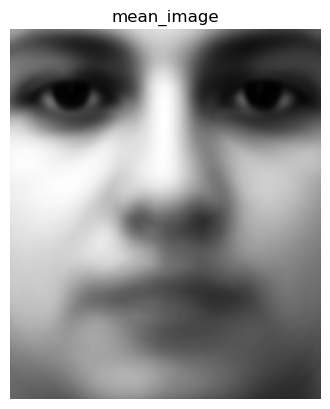

In [94]:
mean_image_vector=np.mean(gamma , axis=1)
mean_image=mean_image_vector.reshape(img.shape)
plt.imshow(mean_image,cmap='gray')
plt.title('mean_image')
plt.axis('off')
plt.show()

## Cov Matrix (15 points)

<div dir="rtl" style="font-size:18px">
    
<div/>

<div dir="rtl" style="font-size:18px">
    در این قسمت باید ماتریس کوواریانس را به صورت زیر تعریف کنید :
    <br/>
    $$
    \Phi_i = \Gamma_i - \Psi
    $$
    <br/>
    $$
    A = [ \Phi_1 \Phi_2 \dots \Phi_n ]
    $$
    <br/>
    $$
    C = A A^T
    $$
    <br/>
    حال بردار ویژه های ماتریس $C$ به ترتیب بزرگی مقدار ویژه های متناظرشان ، Principal Components هایی هستند که ما می‌خواهیم.
    <br/>
    دقت کنید که ماتریس $C$ ماتریسی $N^2\times N^2$ می‌باشد ، سعی کنید روش بهینه ای برای پیدا کردن بردار ویژه های آن پیاده سازی کنید.
    به عنوان راهنمایی از 
    $A^T A$
    کمک بگیرید.
    <br/>
    مقدار این مقادیر ویژه را سورت کنید و درون یک نمودار نشان دهید. 
    <br/>
    بعد از سورت کردن مقدار ویژه‌ها ، بردار ویژه متناظر با 5 مقدار ویژه اول را بکشید.
    این بردار‌های ویژه را eigen face می‌نامیم.
    <br/>
     در نهایت با کمی مطالعه معیاری را انتخاب کنید و تعداد مورد نیاز از Principal Component
     ها از نظرتان را مشخص نمایید و آن تعداد بردار ویژه را انتخاب کنید.
     این عدد را K در نظر بگیرید.
     همچنین ماتریس شامل PCها را U در نظر بگیرید.
    <br/>
<div/>

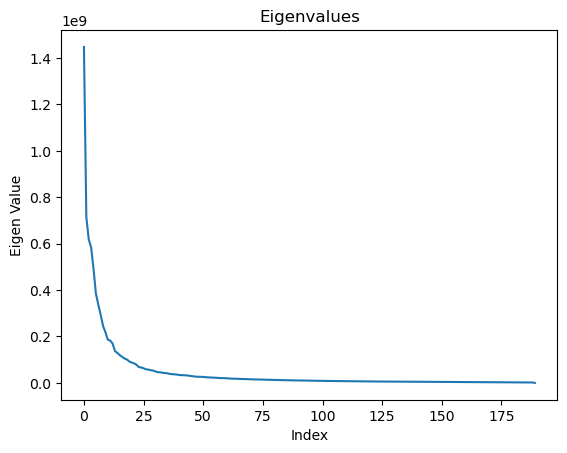

In [95]:
A=gamma-mean_image_vector[:,np.newaxis]

ATA=np.dot(A.T,A)
eigenvalues,eigenvectors=np.linalg.eigh(ATA)

sorted_index=np.argsort(eigenvalues)[::-1]
eigenvalues=eigenvalues[sorted_index]
eigenvectors=eigenvectors[:,sorted_index]

U=np.dot(A,eigenvectors)
U=U/np.linalg.norm(U,axis=0)

plt.plot(eigenvalues)
plt.title('Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigen Value')
plt.show()

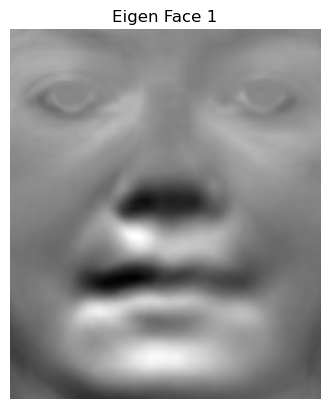

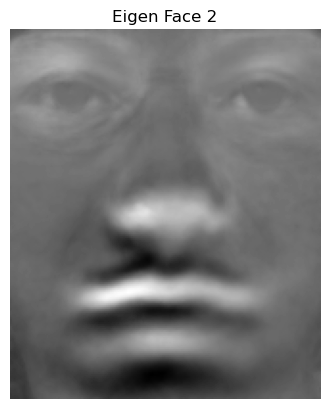

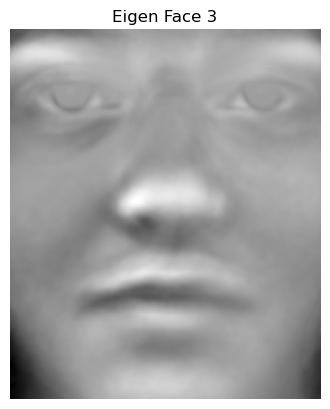

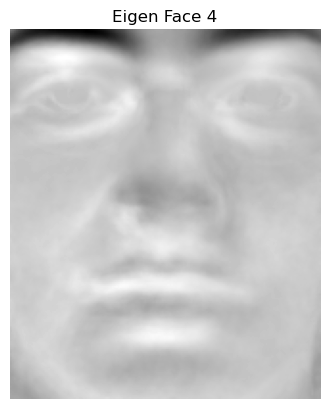

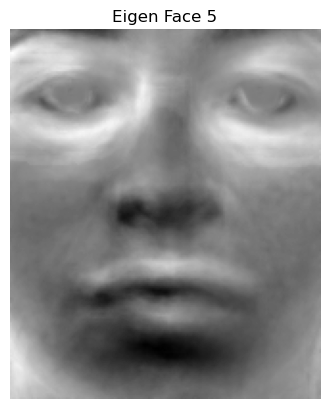

In [96]:
for i in range(5):
    eigen_face=U[:,i].reshape(img.shape)
    plt.imshow(eigen_face,cmap='gray')
    plt.title(f"Eigen Face {i+1}")
    plt.axis('off')
    plt.show()

In [97]:
total_variance=np.sum(eigenvalues)
explained_variance=np.cumsum(eigenvalues)/total_variance

k=np.argmax(explained_variance>=0.95)+1
print(k)
U=U[:,:k]

97


## Reconstruction images (20 points)

<div dir="rtl" style="font-size:18px">
    در این قسمت قرار است که تابعی بنویسید که عکسی را به همراه
    Principal Components
    ‌های مورد نظر بگیرد و آن را دوباره با آن PC‌ها بازسازی کند.
    برای نحوه‌ی انجام این کار از روابط زیر کمک بگیرید.
    <br/>
    $$W = U^T(\Gamma - \Psi)$$
    $$rec = UW + \Psi$$
    <br/>
    دقت کنید که $\Gamma$
    این‌جا عکس ورودی است.
<div/>

In [98]:
def reconstruct_image(orig, pcs):
    """
    A function to reconstruct the original image with the given PCs
    Arguments
    orig - Original image to perform reconstruction on
    pcs  - The principal components to use for the reconstruction
    
    Returns
    recon - The reconstruction of the orig from pcs
    mse   - The Mean Squared Error of the recon with orig
    """
    recon = None
    mse = None
    orig_centered=orig-mean_image_vector
    w=np.dot(pcs.T,orig_centered)
    recon=np.dot(pcs,w)+mean_image_vector
    mse=np.mean((orig - recon)**2)
    return recon, mse

<div dir="rtl" style="font-size:18px">
    )بخش ب(
    <br/>
    حال یکی از عکس‌های دیتاستی که تا الان روی آن کار کردیم )شامل 190 عکس طبیعی( را به صورت رندم انتخاب کنید.
    برای آن عکس به ازای تمام حالت‌های انتخاب K عملیات بازسازی را انجام دهید.
    <br/>
    کمترین و بیشترین MSE را به دست آورید.
    <br/>
    MSE را برای Kای که در قسمت قبل انتخاب کردید محاسبه نمایید.
    <br/>
    سپس نمودار 
    MSE-number of largest principal components
    را رسم کنید.
    <br/>
    در مرحله‌ی بعد برای یک عکس رندم دیگر از دیتاست، عکس اصلی را همراه عکس‌هایی که از بازسازی با در نظر گرفتن 
    5 انتخاب مختلف برای K که کل محدوده تعداد 
    eigen face‌ها را پوشش دهد، 
    رسم کنید.
    <br/>
    نتایج خود را از کار‌هایی که این بخش انجام دادید و از روی خروجی‌های بدست آمده شرح دهید.
<div/>

In [99]:
#این قسمت کد به صورت تصادفی یک تصویر از از دیتاست انتخاب میکنه و عملیات بازسازی تصویر رو برای همه پی سی اس ها انجام میده و در پایان کمترین و بیشترین میزان خطا چاپ میشه
#این مقادیر با استفاده از تعداد خاصی از پی سی اس ها نشون میده که تصویر چقدر به تصویر اصلی نزدیک یا دور است
random_index=random.randint(0,189)
random_image_path=os.path.join(data_dir , normal_images_190[random_index])
random_image=cv2.imread(random_image_path,cv2.IMREAD_GRAYSCALE).flatten()

mse_values=[]
reconstructions=[]
for k in range(1,U.shape[1]+1):
    u_k=U[:,:k]
    recon,mse=reconstruct_image(random_image, u_k)
    mse_values.append(mse)
    reconstructions.append(recon)
min_mse=min(mse_values)
max_mse=max(mse_values)
print(f"Minimum MSE: {min_mse}")
print(f"Maximum MSE: {max_mse}")

Minimum MSE: 87.36131138018241
Maximum MSE: 690.3789040743887


In [100]:
#در اینجا با انتخای 97 عدد که قبلا این عدد رو محاسبه کردم ، تصویر انتخابی بازسازی میشه سپس کمترین خطا برای این میزان پی سی حساب میشه 
u_selected=U[:,:97]
recon_selected,mse_selected=reconstruct_image(random_image,u_selected)
print(f'MSE k={97}  :{mse_selected}')

MSE k=97  :87.36131138018241


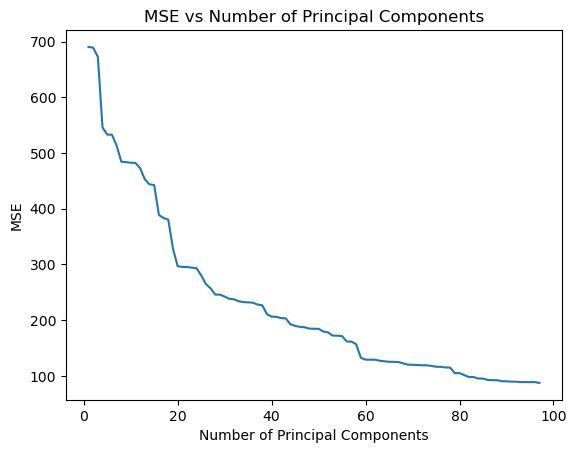

In [101]:
#نشون دادن رابطه بین پی سی ها و میزان دقت بازسازی تصویر
#با افزایش پی سی ها مقدار mse کاهش می یابد
plt.plot(range(1, len(mse_values) + 1), mse_values)
plt.title("MSE vs Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("MSE")
plt.show()

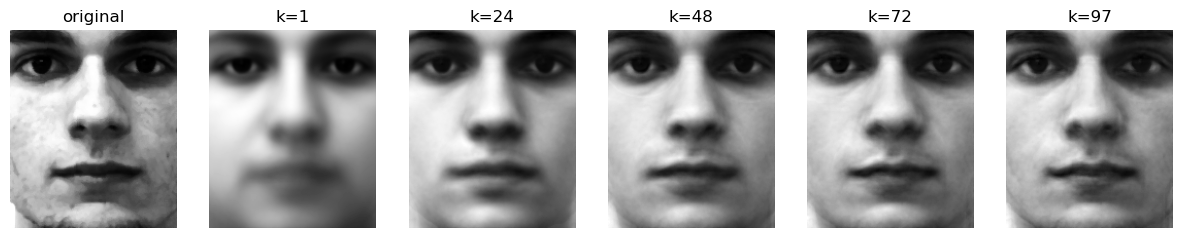

In [102]:
#اینجا یه تصویر رندم انتخاب کردم و برای 5 تا کا مختلف بازسازی رو انجام دادم و هر باز تو یه زیرپلات نمایش دادم
# مقادیر k شامل 1 و 1/2 و 1/4 و 1/3 و k می باشد
#هدف از اینکار مقایسه تصاویر بازسازی شده با تعداد پی سی مختلف است تا ببینیم با افزایش کا کیفیت بازسازی بهتر میشه یا نه
random_index2=random.randint(0,189)
random_image2_path=os.path.join(data_dir,normal_images_190[random_index2])
random_image2=cv2.imread(random_image2_path , cv2.IMREAD_GRAYSCALE).flatten()

k_values=[1,k//4,k//2,(k*3)//4 , k]
plt.figure(figsize=(15,5))
plt.subplot(1,6,1)
plt.imshow(random_image2.reshape(img.shape),cmap='gray')
plt.title('original')
plt.axis('off')

for i,k_val in enumerate(k_values):
    u_k=U[:,:k_val]
    recon,_=reconstruct_image(random_image2 , u_k)
    plt.subplot(1,6,i+2)
    plt.imshow(recon.reshape(img.shape),cmap='gray')
    plt.title(f"k={k_val}")
    plt.axis('off')
plt.show()

##  Smiling  images (10 points)

<div dir="rtl" style="font-size:18px">
    حال این بار تمام کار‌هایی که در بخش قبل )بخش ب( انجام دادید را تکرار کنید. 
    ولی این بار به جای عکس‌های رندم از چهره‌های عادی، عکس رندم از چهره‌های خندان انتخاب کنید.
    نتایج خود را از کار‌هایی که این بخش انجام دادید و از روی خروجی‌های بدست آمده شرح دهید.
    به نظرتان دلایل تفاوت خروجی‌ها در هر قسمت نسبت به قسمت قبل چیست؟
<div/>

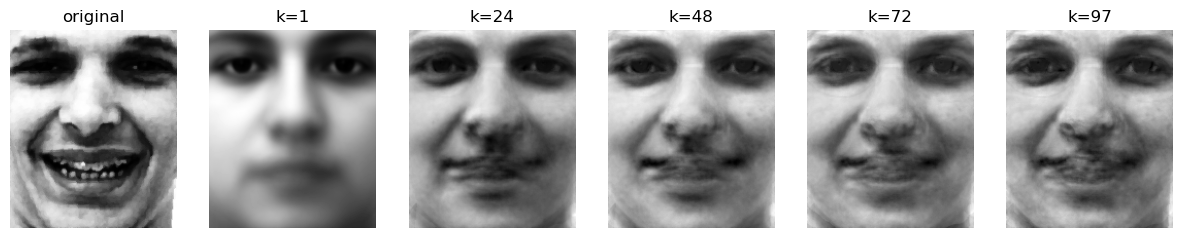

In [104]:
smiling_images_190=smiling_images[:190]
random_index3=random.randint(0,189)
random_image3_path=os.path.join(data_dir,smiling_images_190[random_index3])
random_image3=cv2.imread(random_image3_path , cv2.IMREAD_GRAYSCALE).flatten()

k_values=[1,k//4,k//2,(k*3)//4 , k]
plt.figure(figsize=(15,5))
plt.subplot(1,6,1)
plt.imshow(random_image3.reshape(img.shape),cmap='gray')
plt.title('original')
plt.axis('off')

for i,k_val in enumerate(k_values):
    u_k=U[:,:k_val]
    recon,_=reconstruct_image(random_image3 , u_k)
    plt.subplot(1,6,i+2)
    plt.imshow(recon.reshape(img.shape),cmap='gray')
    plt.title(f"k={k_val}")
    plt.axis('off')
plt.show()

<div dir="rtl" style="font-size:18px">
 دلیل تفاوت خروجی 
    ممکنه تعداد کا برای حالت خندان مناسب نیست و نتونسته بازسازی رو به خوبی حالت عادی نشون بده و همچنین چهره های خندان جزئیات بیشتری داشته باشد و پی سی ای نتواند به طور دقیق تمام جزئیات را برای بازسازی در نظر بگیرد
    
<div/>

## Reconstruction of test set (10 points)


<div dir="rtl" style="font-size:18px">
تا به اینجای کار ما با محاسبه MSE و بازسازی دوباره  عکس‌ها به  شهودی عددی و بصری از دقت فضای جدید یا همان  face space خود رسیدیم. اما نمی‌توان از این نکته چشم‌پوشی کرد که ارزیابی‌های ما از فضای جدید با استفاده از عکس‌هایی انجام شده که با آنها face space را ساخته‌ایم. در نتیجه این ارزیابی ما به نوعی biased است. برای ارزیابی بهتر MSE را بر روی تعدادی عکس که الگوریتم آنها را تا به حال ندیده است انجام داده و آنها را بازسازی می‌کنیم.
    <br/>
    در این قسمت یک عکس از ۱۰ عکس دیده نشده حالت طبیعی را انتخاب نموده و کارهای بخش ب را بر روی آن پیاده کنید. ارزیابی چه تفاوتی کرده است؟ نتیجه‌گیری کنید.
    <br/>
<div/>

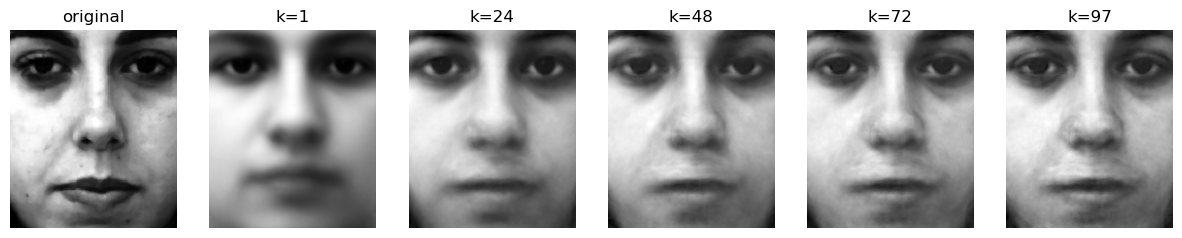

In [105]:
normal_images_10=normal_images[190:200]
random_index4=random.randint(0,9)
random_image4_path=os.path.join(data_dir,normal_images_10[random_index4])
random_image4=cv2.imread(random_image4_path , cv2.IMREAD_GRAYSCALE).flatten()

k_values=[1,k//4,k//2,(k*3)//4 , k]
plt.figure(figsize=(15,5))
plt.subplot(1,6,1)
plt.imshow(random_image4.reshape(img.shape),cmap='gray')
plt.title('original')
plt.axis('off')

for i,k_val in enumerate(k_values):
    u_k=U[:,:k_val]
    recon,_=reconstruct_image(random_image4 , u_k)
    plt.subplot(1,6,i+2)
    plt.imshow(recon.reshape(img.shape),cmap='gray')
    plt.title(f"k={k_val}")
    plt.axis('off')
plt.show()

## Reconstruction of non-human image (10 points)

<div dir="rtl" style="font-size:18px">
دو عکس غیر از چهره انسان و به دلخواه خود )مثل عکس ماشین یا پرنده( را در نظر گرفته.
    نخست عملیات‌های لازم مثل سیاه سفید کردن یا تغییر سایز را انجام دهید.
    سپس با استفاده از تمام PCها 
    سعی بر بازسازی آن داشته باشید و MSE را محاسبه نمایید.
    <br/>
    آیا الگوریتم به اندازه عکس چهره‌ها موفق عمل کرد؟‌ چرا؟ نتیجه‌گیری کنید.
    <br/>
<div/>

## Image Rotation (10 points)

<div dir="rtl" style="font-size:18px">
    حال یکی از عکس‌های دیتاستی که تا الان روی آن کار کردیم )شامل 190 عکس طبیعی( را به صورت رندم انتخاب کنید. برای آن عکس تمام rotationهای ممکن
    )از 0 تا 360( را انجام دهید.
    حال روی هر یک از عکس‌های بدست آمده با استفاده از تمام PCها عملیات بازسازی و محاسبه‌ی MSE را انجام دهید.
    <br/>
    نمودار MSE بر حسب درجه‌ی چرخش را رسم کنید.
    <br/>
    برای 10 درجه به صورت یکنواخت بین 360 و 0، عکس اصلی، عکس بعد از دوران، عکس بازسازی‌شده به کمک الگوریتم را رسم کنید.
    <br/>
    نتایج به دست آمده را تحلیل کنید. آیا MSE در حالت 360 درجه دوران با حالت 0 برابر است؟
    چرا؟
    <br/>
    <br/>
    <font color=blue>
    با استفاده از ndimage میتوانید عکس های خود را بچرخانید.
        <font/>
        <br/>
<div/>